<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

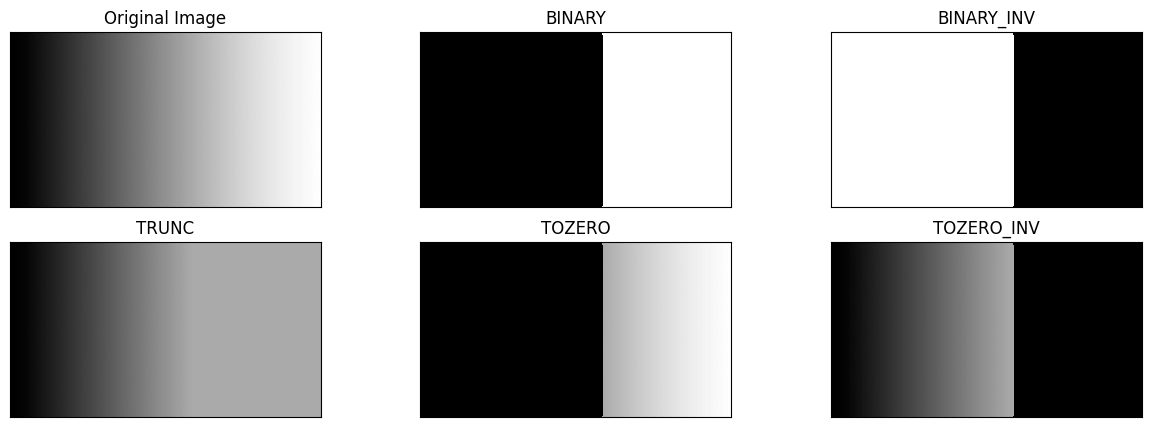

In [4]:
filename = ('/content/drive/MyDrive/PCVK/images/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170
#nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] =255
#tanpa library
thresh1[img<=thresh] = 0
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img>thresh] = thresh
#tanpa library
#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC',
'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

<ipython-input-5-0b41488cfec4>:16: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)


186


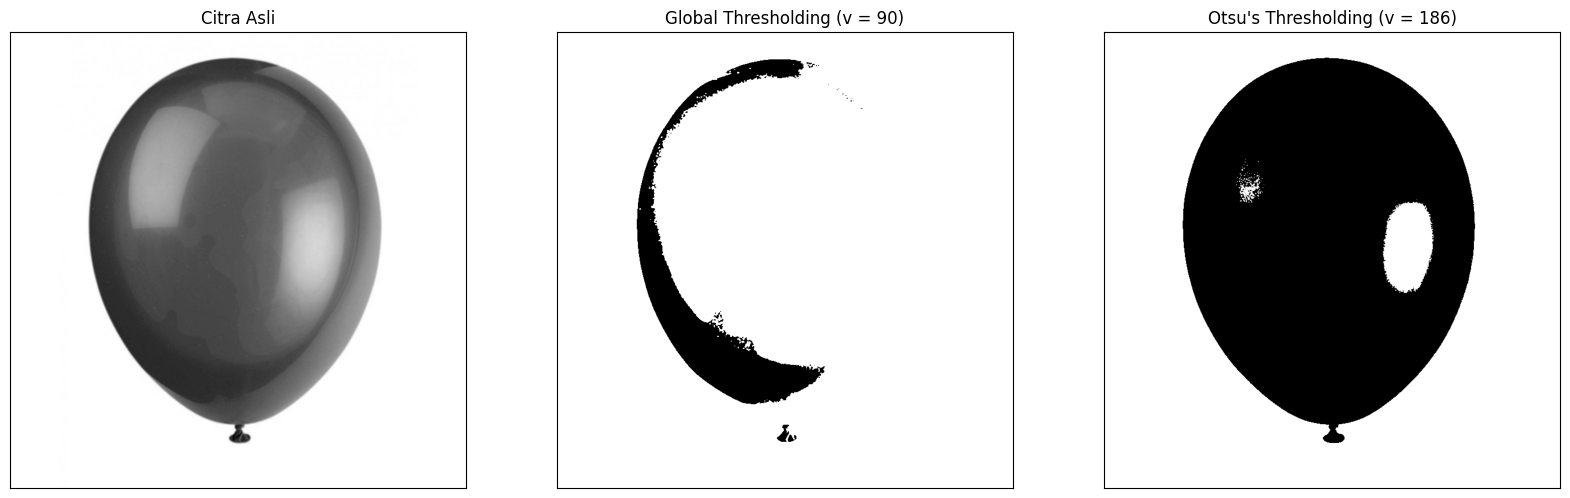

In [5]:
filename = ('/content/drive/MyDrive/PCVK/images/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

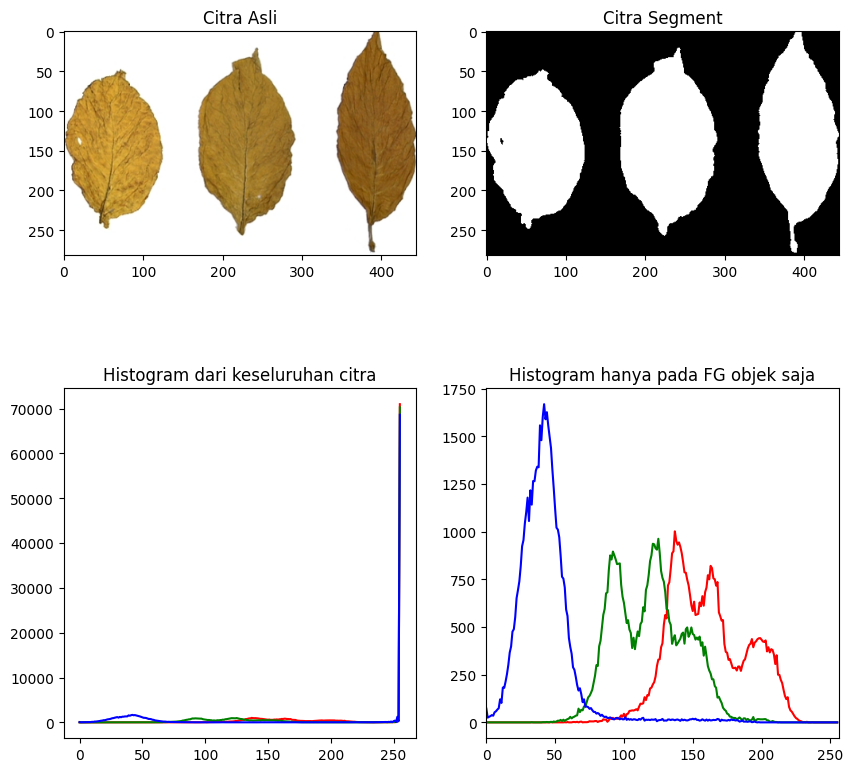

In [6]:
filename = ('/content/drive/MyDrive/PCVK/images/tobacco.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

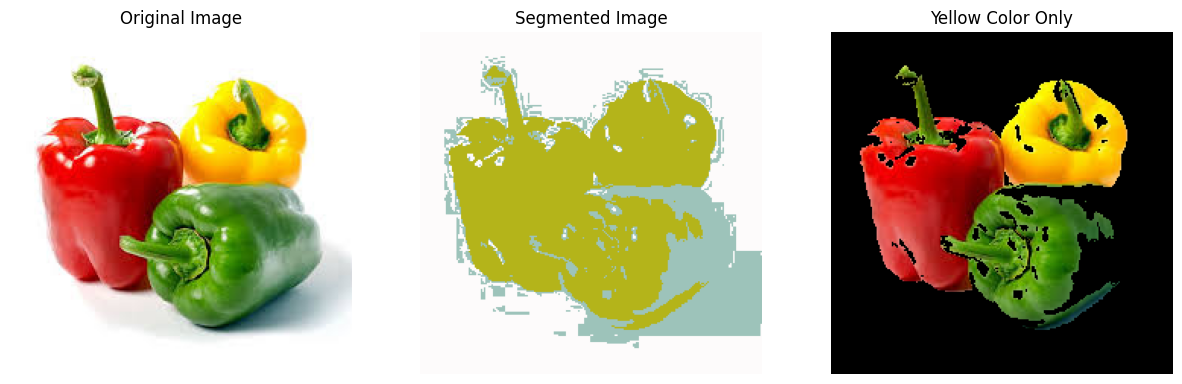

In [9]:
# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/images/pep.jpg')
# Mengubah dari BGR ke RGB untuk visualisasi
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Mengubah dari BGR ke HSV untuk segmentasi warna
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Meratakan array 3D ke 2D untuk K-Means
pixel_values = image_hsv.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Parameter untuk K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # jumlah klaster untuk segmentasi warna
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengubah pusat klaster ke tipe integer
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_hsv.shape)

# Mendefinisikan batas warna kuning di HSV
yellow_lower = np.array([20, 100, 100])
yellow_upper = np.array([30, 255, 255])

# Membuat masker untuk warna kuning
mask = cv2.inRange(segmented_image, yellow_lower, yellow_upper)
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Menampilkan gambar asli, hasil segmentasi, dan hasil warna kuning
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Segmented Image")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Yellow Color Only")
plt.imshow(result)
plt.axis('off')

plt.show()